In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/MECE689_Bowling/MECE689_RL_Bowling_Atari/code

/content/drive/MyDrive/MECE689_Bowling/MECE689_RL_Bowling_Atari/code


In [3]:
!pip install stable-baselines3 gymnasium[atari,accept-rom-license] ale-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip freeze > requirements.txt


In [9]:
import os
import torch
import gymnasium as gym
import stable_baselines3
import ale_py
import numpy as np
from stable_baselines3 import DQN


# Visualization
from PIL import Image
import io
import base64
from IPython.display import display, HTML



# For debugging
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.callbacks import BaseCallback
import time

# Action masking
# from gymnasium import ActionWrapper

# Vector environment
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack, VecEnvWrapper

print("All imports working")

All imports working


In [5]:
print("GPU available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))


GPU available: False


In [6]:
# Create Bowling environment
env = gym.make("ALE/Bowling-v5", render_mode="human")
observation, info = env.reset()

print(f"Action space: {env.action_space}")
print(f"Observation shape: {observation.shape}")

Testing Bowling environment...
Action space: Discrete(6)
Observation shape: (210, 160, 3)


In [7]:
env.close()
print("Bowling env closed")

Bowling test completed successfully!


In [11]:
# Show the first frame as an image
def show_frame(obs):
    # Convert to PIL Image and display
    img = Image.fromarray(obs)
    display(img)

Action space: Discrete(6)
Observation shape: (210, 160, 3)
Observation type: <class 'numpy.ndarray'>


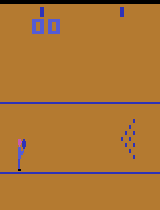


Testing actions:
Step 208: Reward: 3.0


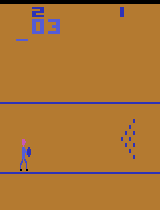

Step 427: Reward: 6.0


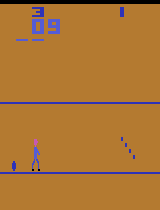

Step 636: Reward: 3.0


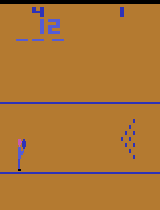

In [16]:
# Create environment WITHOUT human render
env = gym.make("ALE/Bowling-v5")
observation, info = env.reset()

print(f"Action space: {env.action_space}")
print(f"Observation shape: {observation.shape}")
print(f"Observation type: {type(observation)}")

show_frame(observation)

# Test a few actions
print("\nTesting actions:")
for step in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if reward > 0:
      print(f"Step {step}: Reward: {reward}")
      show_frame(observation)


    if terminated or truncated:
        print("Game ended!")
        break

env.close()